In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Load Training Set
filename = os.path.join(os.getcwd(), 'train_hackathon.csv')
train = pd.read_csv(filename)
train.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,02-06-1911,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,NaN,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,04-06-1908,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,NaN,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,NaN,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [3]:
# Load testing set
filename = os.path.join(os.getcwd(), 'test_hackathon.csv')
test = pd.read_csv(filename)
test.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
0,1,1,5,1824-12-31,Columbus,Delaware,OH,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09
1,2,0,7,NaN,Scarsdale,Westchester,NY,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05
2,3,0,8,08-09-1964,Great Neck,Nassau,NY,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05
3,4,0,9,NaN,Hartsdale,Westchester,NY,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05
4,5,0,10,NaN,Lawrence,Nassau,NY,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05


In [4]:
# Taking required columns from TRAIN
train = train[['location.Code', 'location', 'loc.details', 'state', 'deposit_amount_2011', 'deposit_amount_2012', 
               'deposit_amount_2013',  'deposit_amount_2014', 'deposit_amount_2015',  'deposit_amount_2016',
               'deposit_amount_2017']]

In [5]:
# Taking required columns from TEST
test = test[['location.Code', 'location', 'loc.details', 'state', 'deposit_amount_2011', 'deposit_amount_2012', 
             'deposit_amount_2013',  'deposit_amount_2014', 'deposit_amount_2015',  'deposit_amount_2016']]

In [6]:
# Categorical Columns ~ Training
categorical_columns = [col for col in train.columns.values if train[col].dtype == 'object']

data_cat = train[categorical_columns]
data_cat = pd.concat([data_cat, train['location.Code']], axis = 1)
data_cat.head()

,location,loc.details,state,location.Code
0,Wales,Waukesha,WI,2871
1,Germantown,Washington,WI,2872
2,Brookfield,Waukesha,WI,2873
3,Pewaukee,Waukesha,WI,2874
4,Waukesha,Waukesha,WI,2875


In [7]:
# Categorical Coluimns ~ Testing
categorical_columns = [col for col in test.columns.values if test[col].dtype == 'object']

data_cat1 = test[categorical_columns]
data_cat1 = pd.concat([data_cat1, test['location.Code']], axis = 1)
data_cat1.head()

,location,loc.details,state,location.Code
0,Columbus,Delaware,OH,5
1,Scarsdale,Westchester,NY,7
2,Great Neck,Nassau,NY,8
3,Hartsdale,Westchester,NY,9
4,Lawrence,Nassau,NY,10


In [8]:
# Making the number of Categorical Variables in TEST and TRAIN equal
train_objs_num = len(train)
dataset = pd.concat(objs = [data_cat, data_cat1], axis = 0)
dataset = pd.get_dummies(dataset)

train_cat = dataset[:train_objs_num]
test_cat = dataset[train_objs_num:]

In [9]:
# Shape test for both the sets
print(train_cat.shape)
print(test_cat.shape)

(3790, 2283)
(1623, 2283)


In [10]:
#Replacing the null values present in the dataset with their mean

train["deposit_amount_2011"] = train.groupby(['location','loc.details','state'])['deposit_amount_2011'].transform(lambda x: x.fillna(x.mean()))
train["deposit_amount_2012"] = train.groupby(['location','loc.details','state'])['deposit_amount_2012'].transform(lambda x: x.fillna(x.mean()))
train["deposit_amount_2013"] = train.groupby(['location','loc.details','state'])['deposit_amount_2013'].transform(lambda x: x.fillna(x.mean()))
train["deposit_amount_2014"] = train.groupby(['location','loc.details','state'])['deposit_amount_2014'].transform(lambda x: x.fillna(x.mean()))
train["deposit_amount_2015"] = train.groupby(['location','loc.details','state'])['deposit_amount_2015'].transform(lambda x: x.fillna(x.mean()))
train["deposit_amount_2016"] = train.groupby(['location','loc.details','state'])['deposit_amount_2016'].transform(lambda x: x.fillna(x.mean()))


In [11]:
train = train.dropna()

## Removing Outliers

In [12]:
split_data = train

In [13]:
Q1 = split_data['deposit_amount_2011'].quantile(0.25)
Q3 = split_data['deposit_amount_2011'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

78157.5


In [14]:
split_data.drop(split_data[(split_data['deposit_amount_2011'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2011'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [15]:
split_data.shape

(3384, 11)

In [16]:
Q1 = split_data['deposit_amount_2012'].quantile(0.25)
Q3 = split_data['deposit_amount_2012'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

66972.0


In [17]:
split_data.drop(split_data[(split_data['deposit_amount_2012'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2012'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True),

(None,)

In [18]:
split_data.shape

(3274, 11)

In [19]:
Q1 = split_data['deposit_amount_2013'].quantile(0.25)
Q3 = split_data['deposit_amount_2013'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

66331.5


In [20]:
split_data.drop(split_data[(split_data['deposit_amount_2013'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2013'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [21]:
split_data.shape

(3229, 11)

In [22]:
Q1 = split_data['deposit_amount_2014'].quantile(0.25)
Q3 = split_data['deposit_amount_2014'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

67134.0


In [23]:
split_data.drop(split_data[(split_data['deposit_amount_2014'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2014'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [24]:
split_data.shape

(3195, 11)

In [25]:
Q1 = split_data['deposit_amount_2015'].quantile(0.25)
Q3 = split_data['deposit_amount_2015'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

70086.0


In [26]:
split_data.drop(split_data[(split_data['deposit_amount_2015'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2015'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [27]:
split_data.shape

(3166, 11)

In [28]:
Q1 = split_data['deposit_amount_2016'].quantile(0.25)
Q3 = split_data['deposit_amount_2016'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

74391.375


In [29]:
split_data.drop(split_data[(split_data['deposit_amount_2016'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2016'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [30]:
split_data.shape

(3143, 11)

In [31]:
Q1 = split_data['deposit_amount_2017'].quantile(0.25)
Q3 = split_data['deposit_amount_2017'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

109904.625


In [32]:
split_data.drop(split_data[(split_data['deposit_amount_2017'] < (Q1 - 1.5 * IQR)) |(split_data['deposit_amount_2017'] > (Q3 + 1.5 * IQR)) == True].index,inplace = True)

In [33]:
split_data.shape

(3136, 11)

## EDA

In [34]:
data_eda = split_data

In [35]:
# Calculating percentage chaneg below the deposits

def percentage_change(first_no, second_no):
    first_no = round(first_no)
    second_no = round(second_no)
    percent = (second_no - first_no) / first_no
    percent = percent * 100
    percent = round(percent, 2)
    return percent 

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2012']
c = data_eda['deposit_amount_2013']
d = data_eda['deposit_amount_2014']
e = data_eda['deposit_amount_2015']
f = data_eda['deposit_amount_2016']

pert2011_to_2012 = percentage_change(a,b)
pert2012_to_2013 = percentage_change(b,c)
pert2013_to_2014 = percentage_change(c,d)
pert2014_to_2015 = percentage_change(d,e)
pert2015_to_2016 = percentage_change(e,f)

In [36]:
pert2011_to_2012

0        12.14
1         2.00
2        14.76
3         7.91
4        12.52
         ...  
3763     75.59
3764     19.20
3766    157.41
3767     12.50
3771    -24.35
Length: 3136, dtype: float64

In [37]:
data_eda['change%2011_to_2012'] = pert2011_to_2012
data_eda['change%2012_to_2013'] = pert2012_to_2013
data_eda['change%2013_to_2014'] = pert2013_to_2014
data_eda['change%2014_to_2015'] = pert2014_to_2015
data_eda['change%2015_to_2016'] = pert2015_to_2016

In [38]:
data_eda.isnull().sum()

location.Code           0
location                0
loc.details             0
state                   0
deposit_amount_2011     0
deposit_amount_2012     0
deposit_amount_2013     0
deposit_amount_2014     0
deposit_amount_2015     0
deposit_amount_2016     0
deposit_amount_2017     0
change%2011_to_2012    58
change%2012_to_2013    45
change%2013_to_2014    48
change%2014_to_2015    49
change%2015_to_2016    48
dtype: int64

In [39]:
#calculating the average growth rate between 2011 and 2016

def avg_growth_rate(first,second,n):
    rate = (second/first)
    growth_rate = rate**(1/n)
    growth_rate = growth_rate - 1
    growth_rate = growth_rate * 100
    return growth_rate

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2016']

grow2011_to_2016 = avg_growth_rate(a,b,5)

In [40]:
data_eda['Overall_avg_growth_rate'] = grow2011_to_2016

In [41]:
#getting average of all the deposits made

def sma(a,b,c,d,e,f):
    sma = a+b+c+d+e+f / 6
    return sma

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2012']
c = data_eda['deposit_amount_2013']
d = data_eda['deposit_amount_2014']
e = data_eda['deposit_amount_2015']
f = data_eda['deposit_amount_2016']

data_eda['sma'] = sma(a,b,c,d,e,f)

In [42]:
categorical_columns = [col for col in data_eda.columns.values if data_eda[col].dtype != 'object']

a = data_eda[categorical_columns]

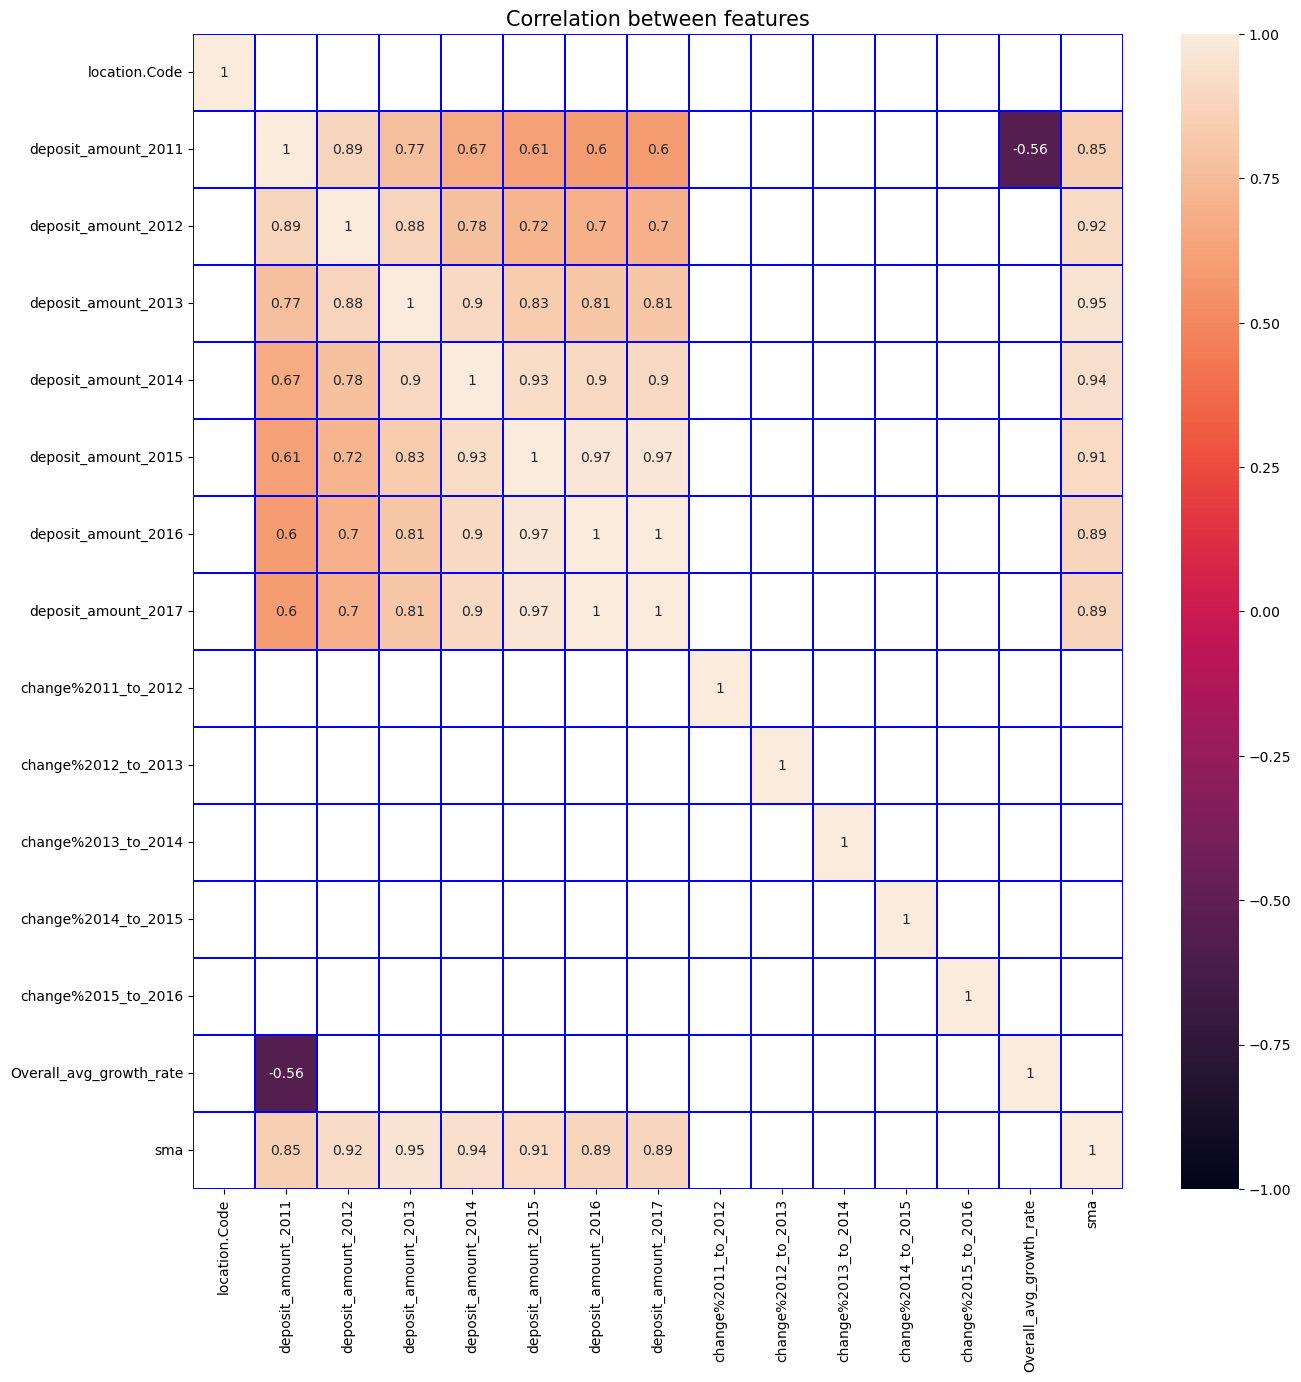

In [43]:
correlation = a.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot = True,linewidths = .1,linecolor = "blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.yticks(rotation = 0)
plt.show()

***The HIGHLY correlated values wii be REMOVED.***

In [44]:
data_eda = data_eda.fillna(0)

In [45]:
# Replacing infinite values with 'nan' and then replace it with 'zero'
data_eda = data_eda.replace([np.inf, -np.inf], np.nan)
data_eda.isnull().sum()

location.Code               0
location                    0
loc.details                 0
state                       0
deposit_amount_2011         0
deposit_amount_2012         0
deposit_amount_2013         0
deposit_amount_2014         0
deposit_amount_2015         0
deposit_amount_2016         0
deposit_amount_2017         0
change%2011_to_2012         3
change%2012_to_2013        13
change%2013_to_2014         0
change%2014_to_2015         0
change%2015_to_2016         1
Overall_avg_growth_rate    15
sma                         0
dtype: int64

In [46]:
data_eda = data_eda.fillna(0)

In [47]:
data_eda.shape

(3136, 18)

In [48]:
data_eda.head()

,location.Code,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017,change%2011_to_2012,change%2012_to_2013,change%2013_to_2014,change%2014_to_2015,change%2015_to_2016,Overall_avg_growth_rate,sma
0,2871,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00,12.14,3.52,8.39,14.02,-0.00,7.484331,199341.50
1,2872,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50,2.00,14.44,13.58,10.66,9.73,9.990337,519762.50
2,2873,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75,14.76,19.88,0.69,5.24,3.67,8.612142,902281.25
3,2874,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25,7.91,8.04,32.21,6.16,-1.21,10.083188,458494.75
4,2875,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25,12.52,-3.18,15.42,-5.86,-3.61,2.671659,562794.25


In [49]:
data_cat_dummies = pd.merge(data_eda, train_cat, how = 'inner', left_on = ['location.Code'], right_on = ['location.Code'])

In [50]:
data_cat_dummies = data_cat_dummies.drop(['location', 'loc.details', 'state'], axis = 1)

In [51]:
data_cat_dummies.head()

,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017,change%2011_to_2012,change%2012_to_2013,...,state_NY,state_OH,state_OK,state_OR,state_PA,state_TX,state_UT,state_WA,state_WI,state_WV
0,2871,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00,12.14,3.52,...,0,0,0,0,0,0,0,0,1,0
1,2872,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50,2.00,14.44,...,0,0,0,0,0,0,0,0,1,0
2,2873,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75,14.76,19.88,...,0,0,0,0,0,0,0,0,1,0
3,2874,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25,7.91,8.04,...,0,0,0,0,0,0,0,0,1,0
4,2875,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25,12.52,-3.18,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data_cat_dummies.isnull().sum()

location.Code          0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
                      ..
state_TX               0
state_UT               0
state_WA               0
state_WI               0
state_WV               0
Length: 2297, dtype: int64

In [53]:
new_data = data_cat_dummies

In [54]:
target = new_data['deposit_amount_2017']

In [55]:
# Removing the highly correlated values
data = new_data.drop(['deposit_amount_2017', 'deposit_amount_2016', 'deposit_amount_2015', 'deposit_amount_2014',
                     'deposit_amount_2013', 'deposit_amount_2012', 'deposit_amount_2011'], axis = 1)

In [56]:
data.shape

(3136, 2290)

In [57]:
data.columns

Index(['location.Code', 'change%2011_to_2012', 'change%2012_to_2013',
       'change%2013_to_2014', 'change%2014_to_2015', 'change%2015_to_2016',
       'Overall_avg_growth_rate', 'sma', 'location_Abbeville',
       'location_Aberdeen',
       ...
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_TX',
       'state_UT', 'state_WA', 'state_WI', 'state_WV'],
      dtype='object', length=2290)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 1)
print("x_train ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

x_train  (2195, 2290)
x_test  (941, 2290)
y_train  (2195,)
y_test  (941,)


In [59]:
# Linear Regression Model using StatsModel
import statsmodels.api as sm

# Building Linear Regression Model using OLS (Ordinary Least Squares)
model1 = sm.OLS(y_train, x_train).fit()

In [60]:
def rmse(predictions, targets):
    differences = predictions - targets                     
    differences_squared = differences ** 2                  
    mean_of_differences_squared = differences_squared.mean() 
    rmse_val = np.sqrt(mean_of_differences_squared)         
    return rmse_val

cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

#Predicting the model on Test Data
predictions1 = model1.predict(x_test)

In [61]:
tmp1 = pd.Series({'Model': "Base Linear Regression Model",
                  'R-Squared Value': model1.rsquared,
                  'Adj.R-Squared Value': model1.rsquared_adj,
                  'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.952409,0.90669,23913.175486


In [62]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
rmse

23913.175485941734

## PERFORMING SAME OPERATION IN TEST AND PREPARING THE SUBMISSION FILE

In [63]:
filename = os.path.join(os.getcwd(), 'test_hackathon.csv')
test = pd.read_csv(filename)
test.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
0,1,1,5,1824-12-31,Columbus,Delaware,OH,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09
1,2,0,7,NaN,Scarsdale,Westchester,NY,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05
2,3,0,8,08-09-1964,Great Neck,Nassau,NY,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05
3,4,0,9,NaN,Hartsdale,Westchester,NY,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05
4,5,0,10,NaN,Lawrence,Nassau,NY,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05


In [64]:
test = test[['location.Code', 'location', 'loc.details', 'state', 'deposit_amount_2011', 'deposit_amount_2012', 
             'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015', 'deposit_amount_2016']]


In [65]:
data_eda = test

In [66]:
def percentage_change(first_no,second_no):
    first_no = round(first_no)
    second_no = round(second_no)
    percent = (second_no - first_no) / first_no
    percent = percent * 100
    percent = round(percent,2)
    return percent

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2012']
c = data_eda['deposit_amount_2013']
d = data_eda['deposit_amount_2014']
e = data_eda['deposit_amount_2015']
f = data_eda['deposit_amount_2016']

pert2011_to_2012 = percentage_change(a,b)
pert2012_to_2013 = percentage_change(b,c)
pert2013_to_2014 = percentage_change(c,d)
pert2014_to_2015 = percentage_change(d,e)
pert2015_to_2016 = percentage_change(e,f)

In [67]:
data_eda['change%2011_to_2012'] = pert2011_to_2012
data_eda['change%2012_to_2013'] = pert2012_to_2013
data_eda['change%2013_to_2014'] = pert2013_to_2014
data_eda['change%2014_to_2015'] = pert2014_to_2015
data_eda['change%2015_to_2016'] = pert2015_to_2016

In [68]:
def avg_growth_rate(first, second, n):
    rate = (second / first)
    growth_rate = rate ** (1/n)
    growth_rate = growth_rate - 1
    growth_rate = growth_rate * 100
    return growth_rate

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2016']

grow2011_to_2016 = avg_growth_rate(a, b, 5)

In [69]:
data_eda['Overall_avg_growth_rate'] = grow2011_to_2016

In [70]:
def sma(a,b,c,d,e,f):
    sma = a+b+c+d+e+f / 6
    return sma

a = data_eda['deposit_amount_2011']
b = data_eda['deposit_amount_2012']
c = data_eda['deposit_amount_2013']
d = data_eda['deposit_amount_2014']
e = data_eda['deposit_amount_2015']
f = data_eda['deposit_amount_2016']

data_eda['sma'] = sma(a,b,c,d,e,f)


In [71]:
data_eda = data_eda.fillna(0)

In [72]:
data_eda = data_eda.replace([np.inf, -np.inf], np.nan)

In [73]:
data_cat_dummies = pd.merge(data_eda, test_cat, how = 'inner', left_on = ['location.Code'], right_on = ['location.Code'])

In [74]:
data_cat_dummies = data_cat_dummies.drop(['location', 'loc.details', 'state'], axis = 1)

In [75]:
new_data = data_cat_dummies

In [76]:
data = new_data.drop(['deposit_amount_2011', 'deposit_amount_2012', 'deposit_amount_2013',
                 'deposit_amount_2014', 'deposit_amount_2015', 'deposit_amount_2016'], axis = 1)

In [77]:
prediction = model1.predict(data)

In [78]:
prediction

0       2.249757e+09
1       8.705533e+05
2       6.274371e+05
3       3.032163e+05
4       5.197718e+05
            ...     
1618    2.673985e+05
1619    2.339209e+05
1620    2.050135e+05
1621    1.778591e+05
1622    5.414617e+04
Length: 1623, dtype: float64

In [79]:
prediction = pd.DataFrame(prediction)

In [80]:
filename = os.path.join(os.getcwd(), 'test_hackathon.csv')

test = pd.read_csv(filename)
test.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
0,1,1,5,1824-12-31,Columbus,Delaware,OH,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09
1,2,0,7,NaN,Scarsdale,Westchester,NY,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05
2,3,0,8,08-09-1964,Great Neck,Nassau,NY,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05
3,4,0,9,NaN,Hartsdale,Westchester,NY,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05
4,5,0,10,NaN,Lawrence,Nassau,NY,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05


In [81]:
sub3 = pd.concat([test['id'], prediction], axis = 1)

In [82]:
sub3.columns = [['id', 'deposit_amount_2017']]

In [83]:
sub3.to_csv("sub3.csv", index = False)

In [84]:
sub3.shape

(1623, 2)

In [85]:
sub3.head()

,id,deposit_amount_2017
0,1,2.249757e+09
1,2,8.705533e+05
2,3,6.274371e+05
3,4,3.032163e+05
4,5,5.197718e+05
